In [82]:
from array import *
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from math import comb
import math
import pandas as pd

In [49]:
#na nb nc -- number of times coins A B C are tossed
# ka kb kc -- number of heads
# k = na + nb + nc

In [50]:
def flip(p):
    return 1.0 if random.random() < p else 0.0

In [148]:
avg_number_of_heads = [[[], []], [[], []], [[], []]]
pa = [0.2, .45]
pb = [0.4, .5]
pc = [0.7, .58]
alpha = [.01, .05, .1]

for z in range(0, 3):
    for i in [0, 1]:
        for N in [20, 100, 1000, 5000]:
            total_heads_arr = np.array([])

            for y in range(0, 1001):

                na = 0
                nb = 0
                nc = 0
                ka = 0 
                kb = 0 
                kc = 0 

                #flipping a b and c
                na += 1
                if flip(pa[i]) == 1:
                    ka += 1

                nb += 1   
                if flip(pb[i]) == 1:
                    kb += 1

                nc += 1
                if flip(pc[i]) == 1:
                    kc += 1

                while na+nb+nc < N:

                    ucba = (ka/na) + math.sqrt((0.5/na)*(math.log(1/alpha[z])))
                    ucbb = (kb/nb) + math.sqrt((0.5/nb)*(math.log(1/alpha[z])))
                    ucbc = (kc/nc) + math.sqrt((0.5/nc)*(math.log(1/alpha[z])))

                    ucb_abc = np.array([ucba,ucbb,ucbc])
                    ucb_max = np.amax(ucb_abc)


                    #tossing the coin with max ucb
                    if ucb_max == ucba:
                        na += 1
                        if flip(pa[i]) == 1:
                            ka += 1

                    elif ucb_max == ucbb:
                        nb += 1
                        if flip(pb[i]) == 1:
                            kb += 1

                    elif ucb_max == ucbc:
                        nc += 1;
                        if flip(pc[i]) == 1:
                            kc += 1

                total_heads = ka+kb+kc
                total_heads_arr =np.append(total_heads_arr,total_heads)


            avg_number_of_heads[z][i].append(np.average(total_heads_arr))



In [156]:
class_1 = {"Case": 12*["pa = .45, pb = .5, pc = .85"], "Alpha": 4*[.01] + 4*[.05] + 4*[.1], "N": 3*[20, 100, 1000, 5000], 
                     "Avg_no_of_heads" : avg_number_of_heads[0][1] + avg_number_of_heads[1][1] + avg_number_of_heads[2][1]}

table = pd.DataFrame(class_1)
#table.append(class_1, ignore_index = True)
#table = table.groupby("Case")
table

class_2 = {"Case": 12*["pa = .2, pb = .4, pc = .7"], "Alpha": 4*[.01] + 4*[.05] + 4*[.1],  "N": 3*[20, 100, 1000, 5000], 
                     "Avg_no_of_heads" : avg_number_of_heads[0][0] + avg_number_of_heads[1][0] + avg_number_of_heads[2][0]}
table_1 = pd.DataFrame(class_2)
table_2 = pd.concat([table, table_1], ignore_index=True)


In [179]:
table_2.groupby(["Case" ,"Alpha", "N"]).first()

Avg_no_of_heads
Case                        Alpha N                    
pa = .2, pb = .4, pc = .7   0.01  20          10.932068
                                  100         63.353646
                                  1000       690.347652
                                  5000      3489.336663
                            0.05  20          11.065934
                                  100         64.437562
                                  1000       692.054945
                                  5000      3493.736264
                            0.10  20          11.156843
                                  100         65.355644
                                  1000       693.442557
                                  5000      3492.533467
pa = .45, pb = .5, pc = .85 0.01  20          10.498501
                                  100         52.924076
                                  1000       560.235764
                                  5000      2867.935065
                            0.05  20          10.188811
                                  100         53.487512
                                  1000       562.627373
                                  5000      2871.371628
                            0.10  20          10.457542
                                  100         53.142857
                                  1000       562.130869
                                  5000      2869.767233

In [171]:
N = 5000
pa = [0.2, .45]
pb = [0.4, .5]
pc = [0.7, .58]
alpha = [.01, .05, .1]

outa_arr = [[np.array([]), np.array([])], [np.array([]), np.array([])], [np.array([]), np.array([])]]
outb_arr = [[np.array([]), np.array([])], [np.array([]), np.array([])], [np.array([]), np.array([])]]
outc_arr = [[np.array([]), np.array([])], [np.array([]), np.array([])], [np.array([]), np.array([])]]
k = np.arange(1, 5001)

for h in range(0, 3):
    for j in [0, 1]:
        for y in range(0, 1001):

            na = 0
            nb = 0
            nc = 0
            ka = 0 
            kb = 0 
            kc = 0 
            ya = np.array([])
            yb = np.array([])
            yc = np.array([])

            #flipping a b and c
            na += 1
            if flip(pa[j]) == 1:
                ka += 1

            ya = np.append(ya, ka/(na + nb + nc))
            yb = np.append(yb, kb/(na + nb + nc))
            yc = np.append(yc, kc/(na + nb + nc))


            nb += 1   
            if flip(pb[j]) == 1:
                kb += 1
            ya = np.append(ya, ka/(na + nb + nc))
            yb = np.append(yb, kb/(na + nb + nc))
            yc = np.append(yc, kc/(na + nb + nc))


            nc += 1
            if flip(pc[j]) == 1:
                kc += 1
            ya = np.append(ya, ka/(na + nb + nc))
            yb = np.append(yb, kb/(na + nb + nc))
            yc = np.append(yc, kc/(na + nb + nc))

            while na+nb+nc < N:

                ucba = (ka/na) + math.sqrt((0.5/na)*(math.log(1/alpha[h])))
                ucbb = (kb/nb) + math.sqrt((0.5/nb)*(math.log(1/alpha[h])))
                ucbc = (kc/nc) + math.sqrt((0.5/nc)*(math.log(1/alpha[h])))

                ucb_abc = np.array([ucba,ucbb,ucbc])
                ucb_max = np.amax(ucb_abc)


                #tossing the coin with max ucb
                if ucb_max == ucba:
                    na += 1
                    if flip(pa[j]) == 1:
                        ka += 1
                    ya = np.append(ya, ka/(na + nb + nc))
                    yb = np.append(yb, kb/(na + nb + nc))
                    yc = np.append(yc, kc/(na + nb + nc))

                elif ucb_max == ucbb:
                    nb += 1
                    if flip(pb[j]) == 1:
                        kb += 1
                    ya = np.append(ya, ka/(na + nb + nc))
                    yb = np.append(yb, kb/(na + nb + nc))
                    yc = np.append(yc, kc/(na + nb + nc))

                elif ucb_max == ucbc:
                    nc += 1;
                    if flip(pc[j]) == 1:
                        kc += 1
                    ya = np.append(ya, ka/(na + nb + nc))
                    yb = np.append(yb, kb/(na + nb + nc))
                    yc = np.append(yc, kc/(na + nb + nc))


            if y == 0:
                outa_arr[h][j] = .001*ya
                outb_arr[h][j] = .001*yb
                outc_arr[h][j] = .001*yc
            else:
                outa_arr[h][j] = np.add(outa_arr[h][j], .001*ya)
                outb_arr[h][j] = np.add(outb_arr[h][j], .001*yb)
                outc_arr[h][j] = np.add(outc_arr[h][j], .001*yc)

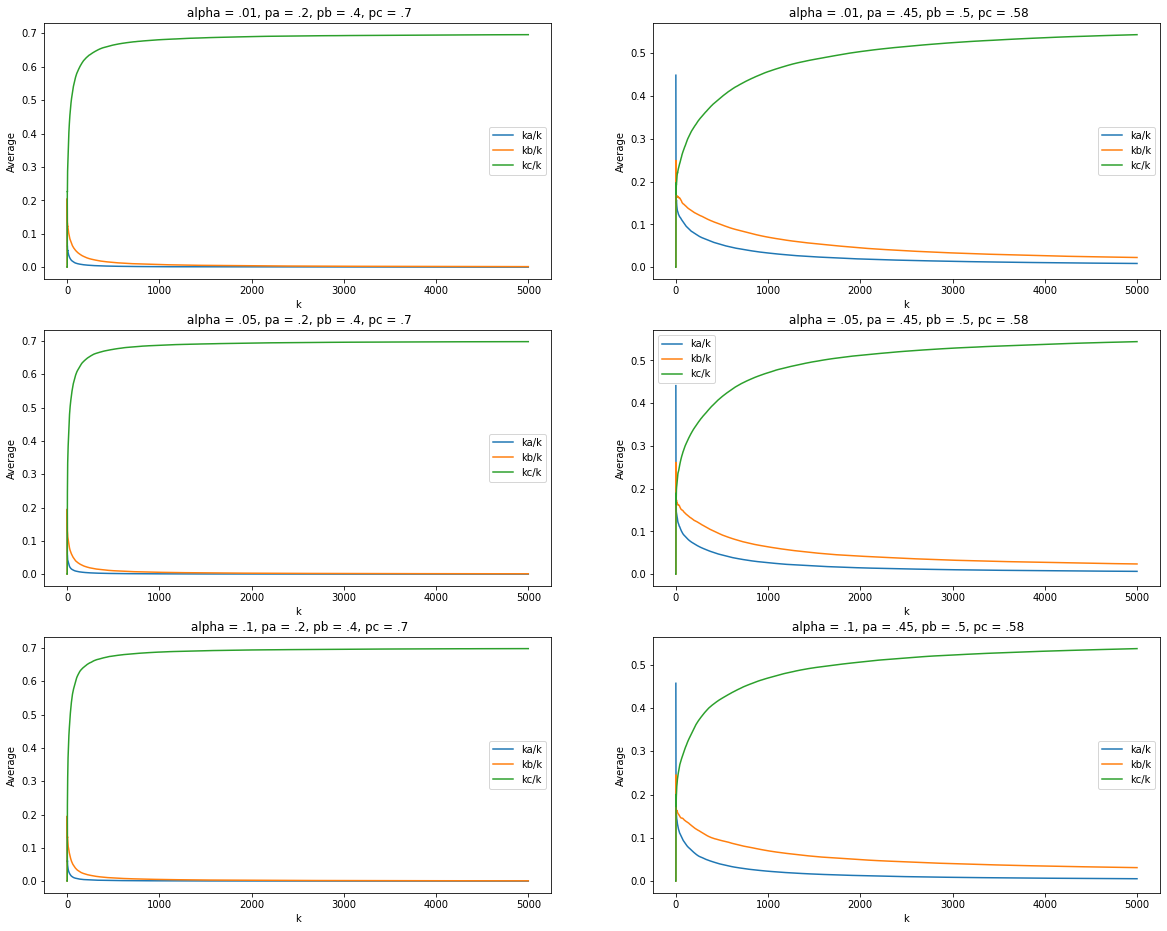

In [173]:
fig_1= plt.figure(figsize  = [20, 16])

plt.subplot(3,2,1)
plt.plot(k, outa_arr[0][0], label = "ka/k")
plt.plot(k, outb_arr[0][0], label = "kb/k")
plt.plot(k, outc_arr[0][0], label = "kc/k")
plt.ylabel("Average")
plt.xlabel("k")

plt.title(" alpha = .01, pa = .2, pb = .4, pc = .7")
plt.legend()

plt.subplot(3,2,3)
plt.plot(k, outa_arr[1][0], label = "ka/k")
plt.plot(k, outb_arr[1][0], label = "kb/k")
plt.plot(k, outc_arr[1][0], label = "kc/k")
plt.ylabel("Average")
plt.xlabel("k")

plt.title(" alpha = .05, pa = .2, pb = .4, pc = .7")
plt.legend()

plt.subplot(3,2,5)
plt.plot(k, outa_arr[2][0], label = "ka/k")
plt.plot(k, outb_arr[2][0], label = "kb/k")
plt.plot(k, outc_arr[2][0], label = "kc/k")
plt.ylabel("Average")
plt.xlabel("k")

plt.title(" alpha = .1, pa = .2, pb = .4, pc = .7")
plt.legend()


plt.subplot(3,2,2)
plt.plot(k, outa_arr[0][1], label = "ka/k")
plt.plot(k, outb_arr[0][1], label = "kb/k")
plt.plot(k, outc_arr[0][1], label = "kc/k")
plt.ylabel("Average")
plt.xlabel("k")

plt.title(" alpha = .01, pa = .45, pb = .5, pc = .58")
plt.legend()

plt.subplot(3,2,4)
plt.plot(k, outa_arr[1][1], label = "ka/k")
plt.plot(k, outb_arr[1][1], label = "kb/k")
plt.plot(k, outc_arr[1][1], label = "kc/k")
plt.ylabel("Average")
plt.xlabel("k")

plt.title(" alpha = .05, pa = .45, pb = .5, pc = .58")
plt.legend()

plt.subplot(3,2,6)
plt.plot(k, outa_arr[2][1], label = "ka/k")
plt.plot(k, outb_arr[2][1], label = "kb/k")
plt.plot(k, outc_arr[2][1], label = "kc/k")
plt.ylabel("Average")
plt.xlabel("k")

plt.title(" alpha = .1, pa = .45, pb = .5, pc = .58")
plt.legend()



plt.show()
